In [ ]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [ ]:
from torchvision.models import mobilenet_v2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
DATASET_PATH = Path ('/content/drive/MyDrive/dataset1-tiff')

Mounted at /content/drive


In [ ]:
mobilenet_model = mobilenet_v2(pretrained=True)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

In [ ]:
# Build the datablock
datablock = DataBlock(
    get_items = get_image_files,
    get_y = parent_label,
    blocks = (ImageBlock, CategoryBlock),
    splitter = GrandparentSplitter(valid_name = 'test'), #splitter
    item_tfms=Resize(224),
    batch_tfms=aug_transforms()
)

In [ ]:
dls = datablock.dataloaders(DATASET_PATH)

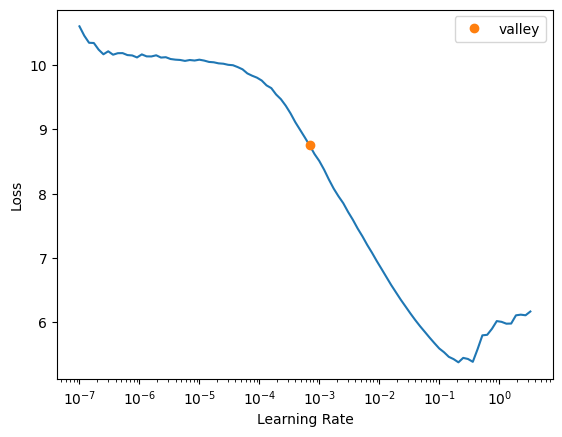

In [ ]:
learn = Learner(dls, mobilenet_model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
# find the best learning rate
lr_rate = learn.lr_find()

In [ ]:
# Train the model
learn.fit_one_cycle(20, lr_rate)

epoch,train_loss,valid_loss,accuracy,time
0,1.672987,1.511514,0.457000,34:07
1,1.251621,1.149501,0.594800,03:51
2,1.097981,1.027630,0.640900,03:49
3,0.956186,0.964139,0.666300,03:50
4,0.842732,0.822531,0.712500,03:50
5,0.771074,0.762533,0.732400,03:50
6,0.702751,0.693117,0.758900,03:49
7,0.628549,0.619420,0.785000,03:50
8,0.592855,0.622181,0.791000,03:50
9,0.514225,0.552063,0.807400,03:49


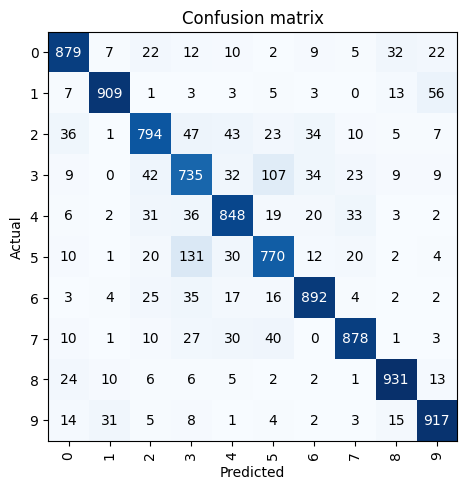

In [ ]:
# evaluate the model
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.recorder.summary()

MobileNetV2 (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 32 x 112 x 112 
Conv2d                                    864        True      
BatchNorm2d                               64         True      
ReLU6                                                          
Conv2d                                    288        True      
BatchNorm2d                               64         True      
ReLU6                                                          
____________________________________________________________________________
                     64 x 16 x 112 x 112 
Conv2d                                    512        True      
BatchNorm2d                               32         True      
____________________________________________________________________________
                     64 x 96 x 112 x 112 
Conv2d                                    1536       True      
BatchNorm2d                       

In [ ]:
# export the model
learn.export('/content/drive/MyDrive/Model/data1_MobileNet.pkl')

In [ ]:
preds, targets = learn.tta()
accuracy(preds, targets).item()

0.8650000095367432